<h1 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Bulldozers Sale Price Prediction</h1>

<a id="table_of_contents"></a>

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#download" style="text-decoration: None">Download Data</a>
2. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
3. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
4. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
5. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
6. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
7. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
    - <a href="#eval_metrics" style="text-decoration: None">Regression Model Evaluation Metrics</a>
    - <a href="#regularized_models" style="text-decoration: None">Regularized Regression Models</a>
    - <a href="#ensemble_gradient" style="text-decoration: None">Ensemble and Gradient Boosting Algorithms</a>
8. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
9. <a href="#performance_summary" style="text-decoration: None">Performance Comparison and Summary</a>
10. <a href="#save_model" style="text-decoration: None">Make Prediction on Test Data and Save Model</a>

<a id="download"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Download Data and Extract Data</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [2]:
!pip install opendatasets

In [3]:
import os 
import opendatasets as od
from zipfile import ZipFile 

In [4]:
od.download('https://www.kaggle.com/competitions/bluebook-for-bulldozers')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  oyebamijimicheal


Your Kaggle Key:

  ································


100%|██████████| 48.4M/48.4M [00:00<00:00, 105MB/s] 



Extracting archive ./bluebook-for-bulldozers/bluebook-for-bulldozers.zip to ./bluebook-for-bulldozers


In [5]:
os.listdir('bluebook-for-bulldozers')

['Data Dictionary.xlsx',
 'Valid.zip',
 'Train.zip',
 'TrainAndValid.zip',
 'TrainAndValid.csv',
 'Train.7z',
 'TrainAndValid.7z',
 'ValidSolution.csv',
 'Valid.7z',
 'Machine_Appendix.csv',
 'random_forest_benchmark_test.csv',
 'Test.csv',
 'median_benchmark.csv',
 'Valid.csv']

In [6]:
# file_path = 'bluebook-for-bulldozers/bluebook-for-bulldozers.zip'
# cwd = os.getcwd() + '/bluebook-for-bulldozers'

# with ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall(cwd)

In [7]:
os.listdir('bluebook-for-bulldozers')

['Data Dictionary.xlsx',
 'Valid.zip',
 'Train.zip',
 'TrainAndValid.zip',
 'TrainAndValid.csv',
 'Train.7z',
 'TrainAndValid.7z',
 'ValidSolution.csv',
 'Valid.7z',
 'Machine_Appendix.csv',
 'random_forest_benchmark_test.csv',
 'Test.csv',
 'median_benchmark.csv',
 'Valid.csv']

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Import Libraries and Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [8]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

import warnings 
warnings.filterwarnings("ignore")

In [9]:
train_df = pd.read_csv('bluebook-for-bulldozers/Train.zip') 
val_df = pd.read_csv('bluebook-for-bulldozers/Valid.csv') 
val_sol_df = pd.read_csv('bluebook-for-bulldozers/ValidSolution.csv') 
test_df = pd.read_csv('bluebook-for-bulldozers/Test.csv') 

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Here I will perform a preliminary analysis by assessing the quality of the data. This involves checking for incorrect data type, missing values, duplicates, summary statistics, erroneous data and so on.

In [10]:
train_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_df.shape

(401125, 53)

In [12]:
# Assert all sales record are unique
assert train_df['SalesID'].nunique() == train_df.shape[0]

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [14]:
train_df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


Only a few columns are numeric. That is, majority of the columns in the data are non-numeric.

<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Some of the data cleaning issues identified include 
- There seems to be a possible data entry error in the minimum `YearMade` which is 1000 
- The `saledate` column datatype needs to be a correctly parsed to a datetime datatype
- Further investigation needs to be made regarding the huge missing values in the data

In [15]:
train_raw_df = train_df.copy()
val_raw_df = val_df.copy()
val_raw_df['SalePrice'] = val_sol_df['SalePrice']
test_raw_df = test_df.copy()

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Incorrect data <code>YearMade</code></h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [16]:
np.sort(train_df['YearMade'].unique())

array([1000, 1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013])

In [17]:
train_df.query('YearMade == 1000').shape

(38185, 53)

Since I do not have much info as to how the data was gathered and also to avoid a large gap between our data, I will simply replace the supposed erroneous entry with 1990. Another justification from my end is that most machines were manufactured in the 1980s - 1990s according to the descriptive statistics.

In [18]:
train_df['YearMade'] = train_df['YearMade'].replace(1000, 1990)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Parse and Extract Useful Info from <code>saledate</code></h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
def parse_extract_saledate(df):
    df['saledate'] = pd.to_datetime(train_df['saledate'])
    df['sale_month'] = df['saledate'].dt.month_name()
    df['sale_day'] = df['saledate'].dt.day_name()
    df['sale_year'] = df['saledate'].dt.year
    
    train_df['age'] = train_df['sale_year'] - train_df['YearMade']
    
    df.sort_values(by=["saledate"], inplace=True, ascending=True)
    
    return df

In [20]:
train_df = parse_extract_saledate(train_df)
val_df = parse_extract_saledate(val_df)
test_df = parse_extract_saledate(test_df)

In [21]:
print(f'The first saledate in the training data is {train_df.saledate.min()}')
print(f'The last saledate in the training data is {train_df.saledate.max()}')

The first saledate in the training data is 1989-01-17 00:00:00
The last saledate in the training data is 2011-12-30 00:00:00


In [22]:
pd.DataFrame(train_df['age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,401125.0,10.69601,7.489706,-12.0,5.0,9.0,15.0,92.0


<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.3. Data Error: <code>age</code></h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

The min data in `age` column seems to be negative which is not possible. It is simply not feasible selling a machine which hasn't been manufactured. 

In [23]:
train_df[train_df['age'] < 0][['YearMade', 'sale_year', 'age']].T

,172520,251546,213253,206920,231762,27786,176543,242681,81843,209191,161311,297931,295706,395524
YearMade,1990,2002,2008,1998,2006,1997,1998,2008,2000,2008,2006,2009,2012,2013
sale_year,1989,1995,1996,1996,1996,1996,1997,1997,1999,2001,2005,2008,2010,2011
age,-1,-7,-12,-2,-10,-1,-1,-11,-1,-7,-1,-1,-2,-2


Looking at the `YearMade` and `sale_year`, perhaps the data entries were swapped. 

In [24]:
incorrect_age_rows = train_df[train_df['age'] < 0]

# Swap 'YearMade' and 'sale_year' values in incorrect rows
train_df.loc[incorrect_age_rows.index, ['YearMade', 'sale_year']] = train_df.loc[incorrect_age_rows.index, ['sale_year', 'YearMade']].values

# Recalculate the 'age' column
train_df['age'] = train_df['sale_year'] - train_df['YearMade']

In [25]:
train_df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,401125.0,10.696304,7.489286,0.0,5.0,9.0,15.0,92.0


<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [26]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:0000:0100:01


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [28]:
plot_color = ['#FF69B4', '#7CFC00', '#FF69B4']
# plot_color = ['#FF6F61', '#008080', '#FFD700', '#7CFC00', '#FF69B4']

In [29]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.85)
    fig.show('svg', width=1000, height=550)

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

### `SalePrice`

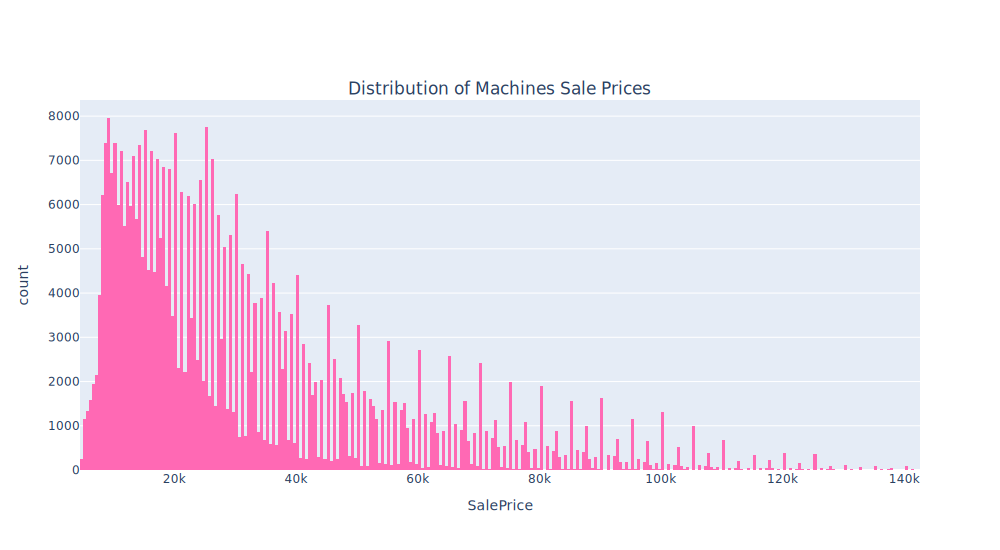

In [30]:
fig = px.histogram(train_df, x='SalePrice', title='Distribution of Machines Sale Prices', color_discrete_sequence=plot_color)
custom_show(fig)

### `YearMade` and `sale_year`

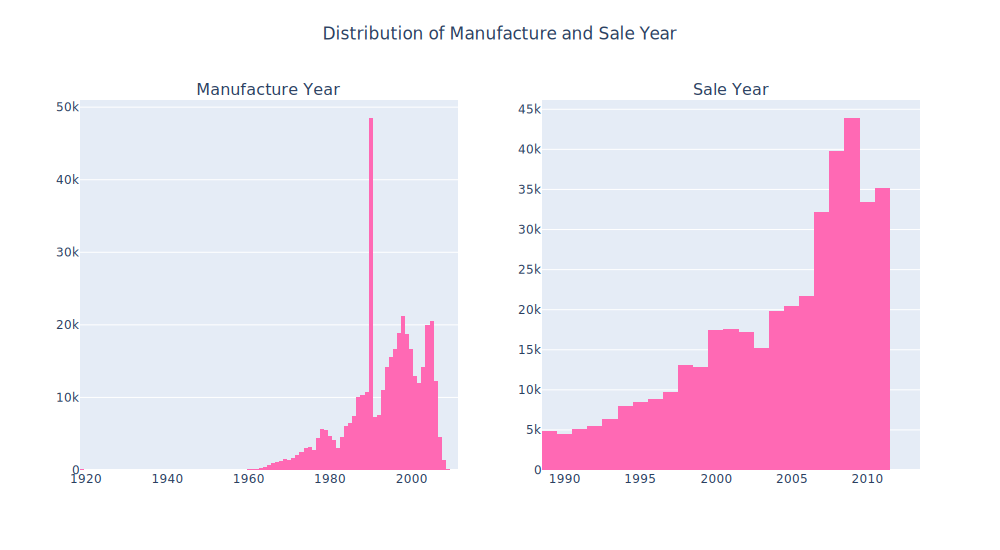

In [31]:
fig1 = px.histogram(train_df, x='YearMade', color_discrete_sequence=plot_color, title='zz')
fig2 = px.histogram(train_df, 'sale_year', color_discrete_sequence=plot_color)

subplot = sp.make_subplots(rows=1, cols=2, subplot_titles=['Manufacture Year', 'Sale Year'])
subplot.add_trace(go.Histogram(fig1['data'][0]), row=1, col=1)
subplot.add_trace(go.Histogram(fig2['data'][0]), row=1, col=2)

subplot.update_layout(title_text='Distribution of Manufacture and Sale Year', title_x=0.5, title_y=0.95)
subplot.show('svg', width=1000, height=550)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

### `YearMade` and `SalePrice`

In [32]:
subset_year_made = train_df[(train_df['YearMade'] >= 1950) & (train_df['YearMade'] < 2005)]

In [33]:
fig = px.violin(subset_year_made, x='YearMade', y='SalePrice', title='YearMade vs. SalePrice', box=True)
# custom_show(fig)

### `age` vs `SalePrice`

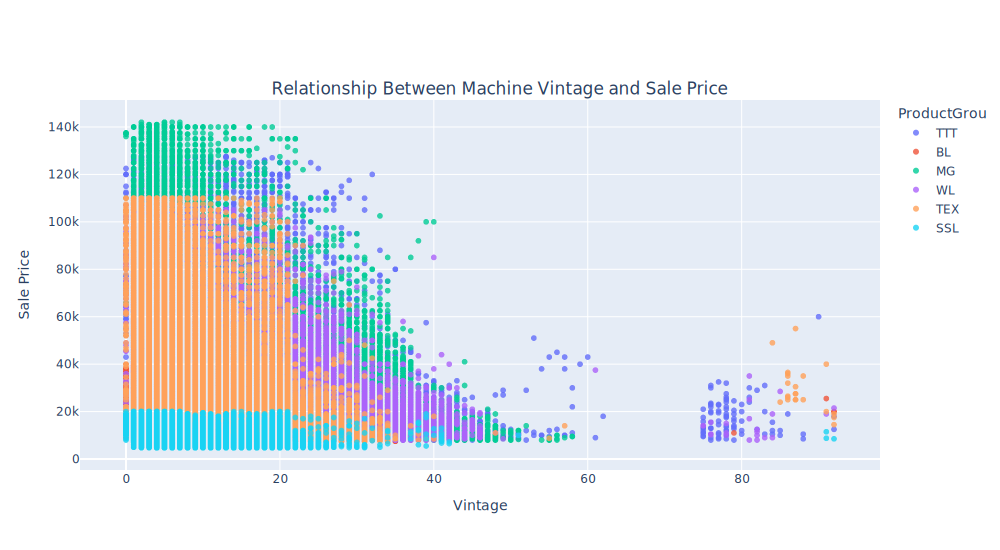

In [34]:
labels = {'age': 'Vintage', 'SalePrice': 'Sale Price'}
title='Relationship Between Machine Vintage and Sale Price'
fig = px.scatter(train_df, x='age', y='SalePrice', title=title, opacity=0.8, color='ProductGroup', labels=labels)
custom_show(fig)

### `State` vs `SalePrice`

In [35]:
state_sales = train_df.groupby('state').agg({'SalePrice': ['count', 'sum']}).reset_index()
state_sales.columns = ['state', 'number_of_sales', 'total_sales']
state_sales = state_sales.sort_values(by='total_sales', ascending=False)
top_five_states = state_sales.head(5)

top_five_states

,state,number_of_sales,total_sales
8,Florida,63944,2178211510
43,Texas,51682,1702355279
4,California,29019,864402048
9,Georgia,14309,461704300
48,Washington,15955,441812650


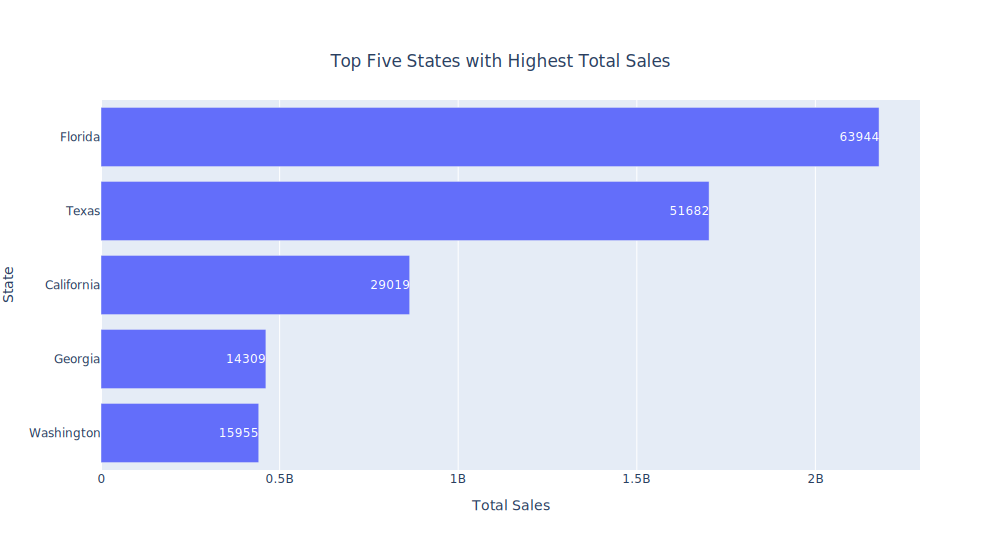

In [36]:
title = 'Top Five States with Highest Total Sales'
labels = {'total_sales': 'Total Sales', 'state': 'State'}
top_five_states.sort_values(by='total_sales', inplace=True)

fig = px.bar(top_five_states, x='total_sales', y='state', title=title, labels=labels, text='number_of_sales')
fig.update_layout(title_x=0.5, title_y=0.9)
fig.show('svg', width=1000, height=550)

### `Month` and `SalePrice`

In [37]:
month_sales = train_df.groupby('sale_month').agg({'SalePrice': ['count', 'sum']}).reset_index()
month_sales.columns = ['sale_month', 'number_of_sales', 'total_sales']
month_sales = month_sales.sort_values(by='total_sales', ascending=False)

month_sales.head()

,sale_month,number_of_sales,total_sales
3,February,52452,1729714506
7,March,54575,1712606850
6,June,47045,1438853531
11,September,43214,1297375639
2,December,39778,1202403291


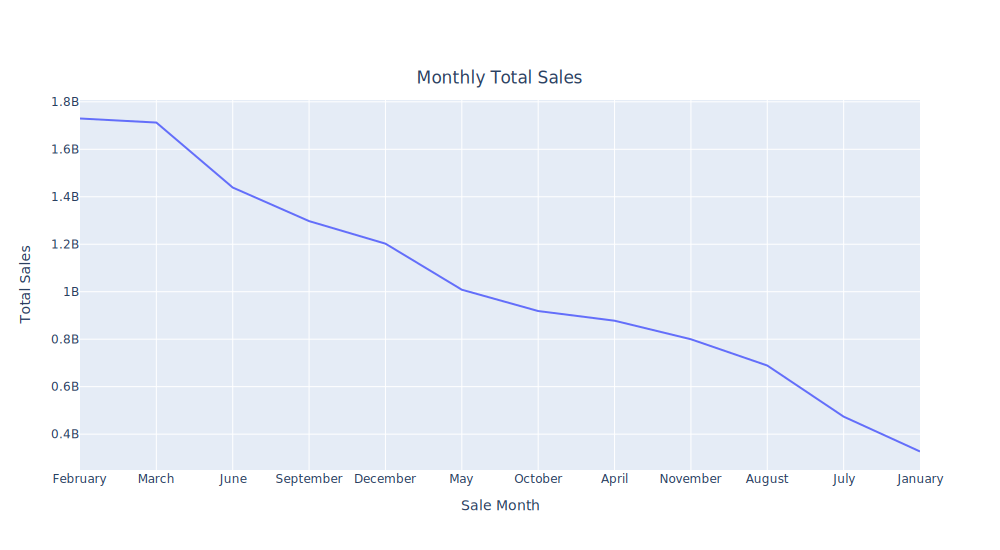

In [38]:
labels = {'sale_month': 'Sale Month', 'total_sales': 'Total Sales'}
fig = px.line(month_sales, x='sale_month', y='total_sales', title='Monthly Total Sales', labels=labels)
fig.update_layout(title_x=0.5, title_y=0.87)
fig.show('svg', width=1000, height=550)

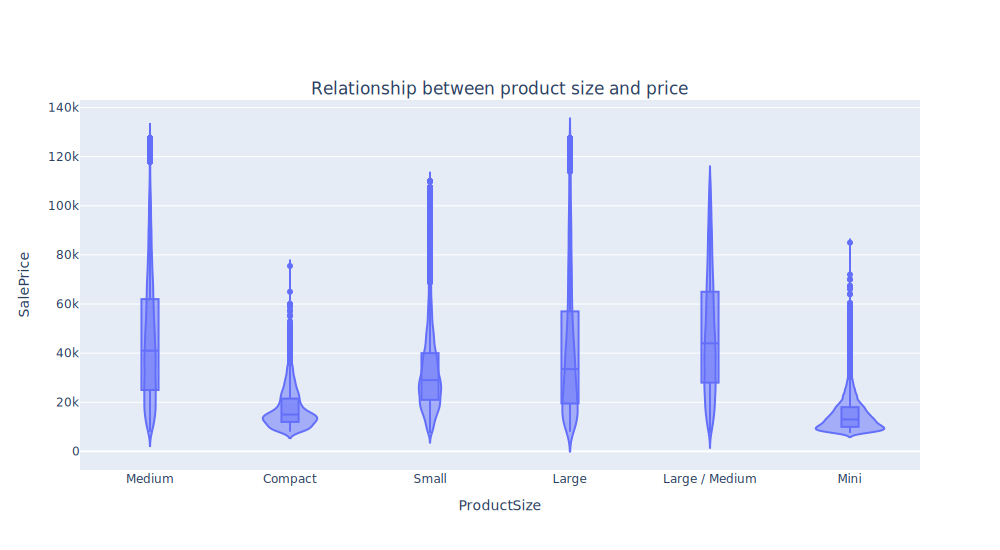

In [39]:
fig = px.violin(train_df, x='ProductSize', y='SalePrice', title='Relationship between product size and price', box=True)
custom_show(fig)

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.1. Fill Missing Values in Numeric Columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [40]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


`auctioneerID` and `MachineHoursCurrentMeter` are numeric columns with missing values in them.

In [41]:
train_df['auctioneerID'].unique()

array([18., 99.,  4.,  1.,  6., 24., 19., 10.,  2., 23., 11., 15., 25.,
       16., 13., 14.,  7., 21.,  5., 12., 28., 20., 22.,  9., 17.,  3.,
        8., nan, 27., 26.,  0.])

In [42]:
train_df['MachineHoursCurrentMeter'].describe()

count    1.427650e+05
mean     3.457955e+03
std      2.759026e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.025000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

I think it makes sense if we fill missing values with the median. In `MachineHoursCurrentMeter` for example, the median is zero and also most of these machines with missing `MachineHoursCurrentMeter` are kinda sold in the 1980s and 1990s. 

In [43]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # fill missing values with median
            train_df[label] = content.fillna(content.median())

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.2. Convert Non-Numeric Columns to Categorical DataType</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [44]:
non_numeric_columns = train_df.select_dtypes(exclude=['number']).columns
train_df[non_numeric_columns] = train_df[non_numeric_columns].astype('category')

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              401125 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  401125 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   saledate                  401125 non-null  category
 10  fiModelDesc               401125 non-null  category
 11  fiBaseModel               401125 non-null  category
 12  fiSecondaryDesc           263934 non-null  category
 13  fiModelSeries             569

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.3. Fill null values in categorical columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [46]:
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories to numbers +1
        train_df[label] = pd.Categorical(content).codes+1

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              401125 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  401125 non-null  float64
 8   UsageBand                 401125 non-null  int8   
 9   saledate                  401125 non-null  int16  
 10  fiModelDesc               401125 non-null  int16  
 11  fiBaseModel               401125 non-null  int16  
 12  fiSecondaryDesc           401125 non-null  int16  
 13  fiModelSeries             401125 non-null  i

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.4. Identify Input and Target Columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [48]:
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'sale_month', 'sale_day', 'sale_year', 'age'],
      dtype='object')

In [49]:
input_cols = ['MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'sale_month', 'sale_day', 'sale_year', 'age']

In [50]:
target_col = 'SalePrice'

In [51]:
X_train = train_df[input_cols]
y_train = train_df[target_col]

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.5. Scale values using MinMaxScaler</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
X_train[input_cols] = scaler.fit_transform(X_train)

Before moving on to the model building phase I will combine all the data cleaning steps into a function.

In [55]:
def preprocess_data(df):
    # Fix incorrect data entry in machines manufacture year
#     df['YearMade'] = df['YearMade'].replace(1000, 1990)

    # Parse and Extract useful info from saledate column
    df['saledate'] = pd.to_datetime(df['saledate'])
    df['sale_month'] = df['saledate'].dt.month
    df['sale_day_of_week'] = df['saledate'].dt.dayofweek
    df['sale_year'] = df['saledate'].dt.year

    # Calculate machine vintage
    df['age'] = df['sale_year'] - df['YearMade']
    
    # Fix any inconsistent value in age column
    incorrect_age_rows = df[df['age'] < 0]

    # Swap 'YearMade' and 'sale_year' values in incorrect rows
    df.loc[incorrect_age_rows.index, ['YearMade', 'sale_year']] = df.loc[
        incorrect_age_rows.index, ['sale_year', 'YearMade']
    ].values

    # Recalculate the 'age' column
    df['age'] = df['sale_year'] - df['YearMade']

    # Fill missing values in numeric columns
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # fill missing values with median
                df[label] = content.fillna(content.median())

    # Convert non-numeric columns to categorical data type
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns
    df[non_numeric_columns] = df[non_numeric_columns].astype('category')

    # Fill null values in categorical columns
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Turn categories to numbers +1
            df[label] = pd.Categorical(content).codes+1

    # Identify input and target columns
    input_cols = ['MachineID', 'ModelID', 'datasource',
           'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
           'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
           'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
           'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
           'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
           'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
           'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
           'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
           'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
           'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
           'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
           'Travel_Controls', 'Differential_Type', 'Steering_Controls',
           'sale_month', 'sale_day_of_week', 'sale_year', 'age']
    target_col = 'SalePrice'
    
    # Input features and target
    X = df[input_cols]
    try:
        y = df[target_col]
    except KeyError: # Test data does not contain target col
        return X
    
    # Scale values using MinMaxScaler
    scaler = MinMaxScaler()
    X[input_cols] = scaler.fit_transform(X)
    
    return X, y

In [56]:
X_train, y_train = preprocess_data(train_raw_df)
X_val, y_val = preprocess_data(val_raw_df)
X_test = preprocess_data(test_raw_df)

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [57]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

<a id="eval_metrics"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Regression Model Evaluation Metrics</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [58]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)    
    
    y_pred = np.abs(y_pred) # Regularized linear models may give negative values 
    
    r2 = model.score(X_val, y_val)
    
    # Number of observations is the shape along axis 0
    n = X_val.shape[0]
    
    # Number of features (predictors, p) is the shape along axis 1
    p = X_val.shape[1]
    
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
    
    R2 = model.score(X_val, y_val)
    
    RMSLE = np.sqrt(mean_squared_log_error(y_val, y_pred))
    
    return R2, adjusted_r2, RMSE, RMSLE

In [59]:
def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_val, y_val)]
    model_metrics = pd.DataFrame(data = df, columns=['R2 Score','Adjusted R2 Score','RMSE', 'RMSLE'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

<a id="regularized_models"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.2. Regularized Regression Models</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [60]:
models = [
    (Ridge(), 'Ridge Regression'),
    (Lasso(), 'Lasso Regression'),
    (ElasticNet(), 'Elastic Net')
]

In [61]:
predictions = []

In [62]:
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [63]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['RMSLE'], ascending=True).style.hide(axis='index')

predictions_base

Model,R2 Score,Adjusted R2 Score,RMSE,RMSLE
Lasso Regression,0.346602,0.343538,21164.006985,0.616087
Ridge Regression,0.331681,0.328548,21401.590832,0.622771
Elastic Net,0.126073,0.121976,24500.532191,0.663559


<a id="ensemble_gradient"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.3. Ensemble and Gradient Boosting Algorithms</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [64]:
models = [
    (RandomForestRegressor(n_jobs=-1, max_samples=30000), 'Random Forest Regressor'),
    (LGBMRegressor(verbose=-1), 'LightGBM Regressor'),
    (XGBRegressor(n_jobs=-1, random_state=42, n_estimators=50, max_depth=5, learning_rate=0.2), 'XGBoost Regressor')
]

In [65]:
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [66]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['RMSLE'], ascending=True).style.hide(axis='index')

predictions_base

Model,R2 Score,Adjusted R2 Score,RMSE,RMSLE
Random Forest Regressor,0.752183,0.751021,13046.790210,0.342185
XGBoost Regressor,0.592684,0.590775,16724.983885,0.440831
LightGBM Regressor,0.516822,0.514557,18217.614063,0.469383
Lasso Regression,0.346602,0.343538,21164.006985,0.616087
Ridge Regression,0.331681,0.328548,21401.590832,0.622771
Elastic Net,0.126073,0.121976,24500.532191,0.663559


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Here, I have decided to tune the hyperparameters of the Elastic and Random Forest models only.

In [67]:
from sklearn.model_selection import RandomizedSearchCV

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8.1. Elastic Net</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [68]:
elastic_net_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic_net = ElasticNet()

In [69]:
elastic_net_tuned = RandomizedSearchCV(
    elastic_net,
    param_distributions=elastic_net_grid,
    cv=5,
    n_iter=10,
    verbose=True,
    random_state=42,
    n_jobs=-1
)

In [70]:
elastic_net_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.5, 1.0],
                                        'l1_ratio': [0.1, 0.5, 0.9]},
                   random_state=42, verbose=True)

In [71]:
# Get the best hyperparameters
best_params = elastic_net_tuned.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'l1_ratio': 0.9, 'alpha': 0.1}


In [72]:
# Train Elastic Net with the best parameters found

elastic_net_tuned = ElasticNet(l1_ratio=0.9, alpha=0.1)
elastic_net_tuned.fit(X_train, y_train)
elastic_net_tuned_metrics = metric_df(elastic_net_tuned, 'Tunned Elastic Net')
predictions.append(elastic_net_tuned_metrics)

In [73]:
elastic_net_tuned_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE,RMSLE
0,Tunned Elastic Net,0.355977,0.352958,21002.458789,0.592796


<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8.2. Random Forest</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [74]:
rf_grid = {'n_estimators': np.arange(10, 100, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt'],
           'max_samples': [20000]
}

In [75]:
rf_tuned = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True, 
                              random_state=42,
                              n_jobs=-1)

In [76]:
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   random_state=42, verbose=True)

In [77]:
rf_tuned.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [78]:
# Train Random Forest with the best parameters found

rf_tuned = RandomForestRegressor(n_estimators=60,
                                 min_samples_leaf=4,
                                 min_samples_split=3,
                                 max_features=0.5,
                                 max_depth=None,
                                 max_samples=20000,
                                 n_jobs=-1,
                                 random_state=42
)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, max_samples=20000, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [79]:
rf_tuned_metrics = metric_df(rf_tuned, 'Tunned Random Forest')
predictions.append(rf_tuned_metrics)

rf_tuned_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE,RMSLE
0,Tunned Random Forest,0.733435,0.732185,13531.311094,0.338604


<a id="performance_summary"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9. Performance Comparison and Summary</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [80]:
predictions_all = pd.concat(predictions, ignore_index=True, sort=False)
predictions_all = predictions_all.sort_values(by=['RMSLE'], ascending=True).style.hide(axis='index')

predictions_all

Model,R2 Score,Adjusted R2 Score,RMSE,RMSLE
Tunned Random Forest,0.733435,0.732185,13531.311094,0.338604
Random Forest Regressor,0.752183,0.751021,13046.790210,0.342185
XGBoost Regressor,0.592684,0.590775,16724.983885,0.440831
LightGBM Regressor,0.516822,0.514557,18217.614063,0.469383
Tunned Elastic Net,0.355977,0.352958,21002.458789,0.592796
Lasso Regression,0.346602,0.343538,21164.006985,0.616087
Ridge Regression,0.331681,0.328548,21401.590832,0.622771
Elastic Net,0.126073,0.121976,24500.532191,0.663559


<a id="performance_summary"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9.1. Feature Importance</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [81]:
importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'importance': rf_tuned.feature_importances_
}).sort_values('importance', ascending=False)

In [82]:
importance_df.head()

,feature,importance
53,age,0.183451
12,ProductSize,0.175717
13,fiProductClassDesc,0.068875
4,YearMade,0.068720
9,fiSecondaryDesc,0.062873


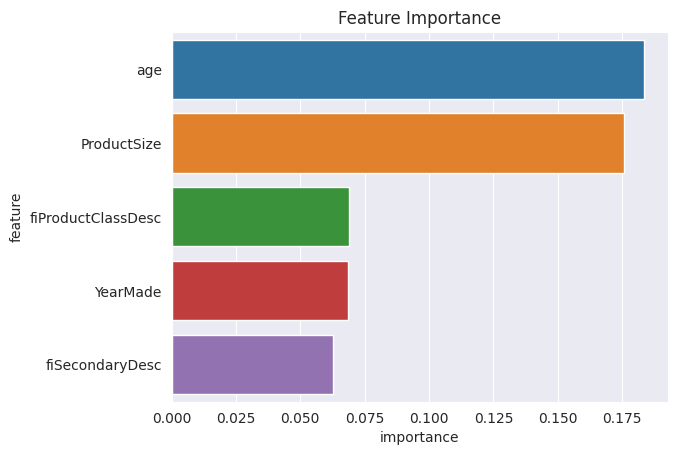

In [83]:
sns.barplot(data=importance_df.head(), x='importance', y='feature')
plt.title('Feature Importance');

<a id="save_model"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10. Make Prediction on Test Data and Save Model</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [84]:
X_test

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_month,sale_day_of_week,sale_year,age
0,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3,2012,13
1,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,5,3,2012,1012
2,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,5,3,2012,8
3,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,5,3,2012,6
4,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,5,3,2012,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,2558317,21450,149,2,2008,3525.0,0,713,235,44,37,0,6,26,8,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,17,20,3,1,1,0,0,0,0,0,10,2,2012,4
12453,2558332,21434,149,2,2005,3525.0,0,186,80,43,0,0,5,13,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,3,1,1,0,0,0,0,0,10,2,2012,7
12454,2558342,21437,149,2,1000,3525.0,0,325,123,43,0,0,5,17,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,3,1,1,0,0,0,0,0,10,2,2012,1012
12455,2558343,21437,149,2,2006,3525.0,0,325,123,43,0,0,5,17,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,3,1,1,0,0,0,0,0,10,2,2012,6


In [85]:
y_preds = rf_tuned.predict(X_test)
y_preds

array([22885.46626984, 27654.44246032, 40435.23809524, ...,
       35477.50198413, 35477.50198413, 35909.77380952])

In [86]:
sub_df = pd.DataFrame()
sub_df['SalesID'] = test_df['SalesID']
sub_df['SalePrice'] = y_preds
sub_df

,SalesID,SalePrice
7648,6333277,22885.466270
8228,6436908,27654.442460
6770,6310651,40435.238095
4051,6270209,40435.238095
243,1228654,31875.004960
...,...,...
10045,6621806,35909.773810
10044,6621802,35477.501984
10010,6621536,35477.501984
10012,6621589,35477.501984


In [87]:
sub_df['SalePrice'] = y_preds

In [88]:
sub_df.to_csv('submisson.csv', index=None)